https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('Sunspots', sep="   ", header=None)

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [14]:
df.head(3)

,0,1
0,1700,0.0262
1,1701,0.0575
2,1702,0.0837


In [15]:
df.columns = ['Year', 'Spots']
df.head(3)

,Year,Spots
0,1700,0.0262
1,1701,0.0575
2,1702,0.0837


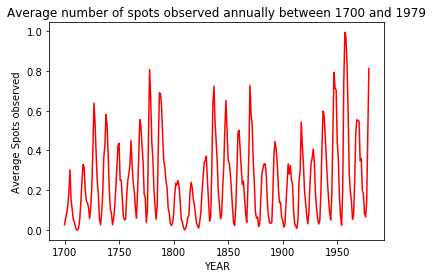

In [16]:
plt.plot(df['Year'], df['Spots'], color='r')
plt.xlabel('YEAR')
plt.ylabel('Average Spots observed')
plt.title('Average number of spots observed annually between 1700 and 1979')
plt.show()

In [17]:
df['Spots'].isna().sum()

0

In [42]:
df_training = df[0:221]
df_validation = df[210:256]
df_test = df[244:]

In [43]:
df_training.head(3)

,Year,Spots
0,1700,0.0262
1,1701,0.0575
2,1702,0.0837


In [45]:
df_validation.head(14)

,Year,Spots
210,1910,0.0973
211,1911,0.0298
212,1912,0.0188
213,1913,0.0073
214,1914,0.0502
215,1915,0.2479
216,1916,0.2986
217,1917,0.5434
218,1918,0.4215
219,1919,0.3326


In [75]:
df_test.head(13)

,Year,Spots
244,1944,0.0502
245,1945,0.1736
246,1946,0.4843
247,1947,0.7929
248,1948,0.7128
249,1949,0.7045
250,1950,0.4388
251,1951,0.3630
252,1952,0.1647
253,1953,0.0727


In [47]:
series_training = np.array(df_training['Spots'])
series_training

array([0.0262, 0.0575, 0.0837, 0.1203, 0.1883, 0.3033, 0.1517, 0.1046,
       0.0523, 0.0418, 0.0157, 0.    , 0.    , 0.0105, 0.0575, 0.1412,
       0.2458, 0.3295, 0.3138, 0.204 , 0.1464, 0.136 , 0.1151, 0.0575,
       0.1098, 0.2092, 0.4079, 0.6381, 0.5387, 0.3818, 0.2458, 0.1831,
       0.0575, 0.0262, 0.0837, 0.1778, 0.3661, 0.4236, 0.5805, 0.5282,
       0.3818, 0.2092, 0.1046, 0.0837, 0.0262, 0.0575, 0.1151, 0.2092,
       0.3138, 0.4231, 0.4362, 0.2495, 0.25  , 0.1606, 0.0638, 0.0502,
       0.0534, 0.17  , 0.2489, 0.2824, 0.329 , 0.4493, 0.3201, 0.2359,
       0.1904, 0.1093, 0.0596, 0.1977, 0.3651, 0.5549, 0.5272, 0.4268,
       0.3478, 0.182 , 0.16  , 0.0366, 0.1036, 0.4838, 0.8075, 0.6585,
       0.4435, 0.3562, 0.2014, 0.1192, 0.0534, 0.126 , 0.4336, 0.6904,
       0.6846, 0.6177, 0.4702, 0.3483, 0.3138, 0.2453, 0.2144, 0.1114,
       0.0837, 0.0335, 0.0214, 0.0356, 0.0758, 0.1778, 0.2354, 0.2254,
       0.2484, 0.2207, 0.147 , 0.0528, 0.0424, 0.0131, 0.    , 0.0073,
      

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
generator_training = TimeseriesGenerator(series_training, series_training, length=n_input, batch_size=1)

In [49]:
generator_training[0]

(array([[0.0262, 0.0575, 0.0837, 0.1203, 0.1883, 0.3033, 0.1517, 0.1046,
         0.0523, 0.0418, 0.0157, 0.    ]]), array([0.]))

In [50]:
for i in range(len(generator_training)):
    x, y = generator_training[i]
    print('%s => %s' % (x, y))

[[0.0262 0.0575 0.0837 0.1203 0.1883 0.3033 0.1517 0.1046 0.0523 0.0418
  0.0157 0.    ]] => [0.]
[[0.0575 0.0837 0.1203 0.1883 0.3033 0.1517 0.1046 0.0523 0.0418 0.0157
  0.     0.    ]] => [0.0105]
[[0.0837 0.1203 0.1883 0.3033 0.1517 0.1046 0.0523 0.0418 0.0157 0.
  0.     0.0105]] => [0.0575]
[[0.1203 0.1883 0.3033 0.1517 0.1046 0.0523 0.0418 0.0157 0.     0.
  0.0105 0.0575]] => [0.1412]
[[0.1883 0.3033 0.1517 0.1046 0.0523 0.0418 0.0157 0.     0.     0.0105
  0.0575 0.1412]] => [0.2458]
[[0.3033 0.1517 0.1046 0.0523 0.0418 0.0157 0.     0.     0.0105 0.0575
  0.1412 0.2458]] => [0.3295]
[[0.1517 0.1046 0.0523 0.0418 0.0157 0.     0.     0.0105 0.0575 0.1412
  0.2458 0.3295]] => [0.3138]
[[0.1046 0.0523 0.0418 0.0157 0.     0.     0.0105 0.0575 0.1412 0.2458
  0.3295 0.3138]] => [0.204]
[[0.0523 0.0418 0.0157 0.     0.     0.0105 0.0575 0.1412 0.2458 0.3295
  0.3138 0.204 ]] => [0.1464]
[[0.0418 0.0157 0.     0.     0.0105 0.0575 0.1412 0.2458 0.3295 0.3138
  0.204  0.1464]] => [0

  0.0649 0.0178]] => [0.0314]
[[0.1966 0.387  0.727  0.5816 0.5314 0.3462 0.2338 0.0889 0.0591 0.0649
  0.0178 0.0314]] => [0.1689]
[[0.387  0.727  0.5816 0.5314 0.3462 0.2338 0.0889 0.0591 0.0649 0.0178
  0.0314 0.1689]] => [0.284]
[[0.727  0.5816 0.5314 0.3462 0.2338 0.0889 0.0591 0.0649 0.0178 0.0314
  0.1689 0.284 ]] => [0.3122]
[[0.5816 0.5314 0.3462 0.2338 0.0889 0.0591 0.0649 0.0178 0.0314 0.1689
  0.284  0.3122]] => [0.3332]
[[0.5314 0.3462 0.2338 0.0889 0.0591 0.0649 0.0178 0.0314 0.1689 0.284
  0.3122 0.3332]] => [0.3321]
[[0.3462 0.2338 0.0889 0.0591 0.0649 0.0178 0.0314 0.1689 0.284  0.3122
  0.3332 0.3321]] => [0.273]
[[0.2338 0.0889 0.0591 0.0649 0.0178 0.0314 0.1689 0.284  0.3122 0.3332
  0.3321 0.273 ]] => [0.1328]
[[0.0889 0.0591 0.0649 0.0178 0.0314 0.1689 0.284  0.3122 0.3332 0.3321
  0.273  0.1328]] => [0.0685]
[[0.0591 0.0649 0.0178 0.0314 0.1689 0.284  0.3122 0.3332 0.3321 0.273
  0.1328 0.0685]] => [0.0356]
[[0.0649 0.0178 0.0314 0.1689 0.284  0.3122 0.3332 0.332

In [86]:
# define model
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [122]:
# fit model
model.fit_generator(generator_training, steps_per_epoch=1, epochs=2000, verbose=1)

Epoch 1/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0058
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7314e-06
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.2535e-05
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.9605e-04
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.2715e-04
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - loss: 5.5755e-04
Epoch 13/2000
1/1 [=========

Epoch 102/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.9252e-04
Epoch 103/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 104/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0010
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 106/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0295
Epoch 107/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.1750e-04
Epoch 108/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 109/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 110/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0065
Epoch 111/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 112/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 113/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0438
Epoch 114/2000
1/1

Epoch 202/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.7045e-04
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 205/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 206/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0012
Epoch 207/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 208/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.4621e-04
Epoch 209/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 210/2000
1/1 [==============================] - 0s 180ms/step - loss: 0.0062
Epoch 211/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 212/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.9655e-04
Epoch 213/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137
Epoch 214/200

Epoch 302/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 303/2000
1/1 [==============================] - 0s 2ms/step - loss: 7.9402e-05
Epoch 304/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 305/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 306/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.6898e-04
Epoch 307/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 309/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 310/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 311/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 312/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 313/2000
1/1 [==============================] - 0s 2ms/step - loss: 7.9122e-04
Epoch 314/2000
1

Epoch 402/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 403/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.5868e-04
Epoch 404/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 405/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 406/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4604e-04
Epoch 407/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 408/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 409/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 410/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 411/2000
1/1 [==============================] - 0s 9ms/step - loss: 7.7180e-04
Epoch 412/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 413/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 414/2000
1

Epoch 502/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 503/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 504/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 505/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 506/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 507/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 508/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 509/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.9177e-05
Epoch 510/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0030
Epoch 511/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 512/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 513/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 514/2000
1/1 [===

Epoch 602/2000
1/1 [==============================] - 0s 14ms/step - loss: 3.1575e-04
Epoch 603/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 604/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7382e-05
Epoch 605/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 606/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 607/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.6869e-04
Epoch 608/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 609/2000
1/1 [==============================] - 0s 994us/step - loss: 0.0029
Epoch 610/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 611/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 612/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 613/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 614/200

Epoch 702/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 703/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.4038e-05
Epoch 704/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 705/2000
1/1 [==============================] - 0s 2ms/step - loss: 7.2543e-05
Epoch 706/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 707/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3131e-04
Epoch 708/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1120e-04
Epoch 709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 710/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.1641e-04
Epoch 711/2000
1/1 [==============================] - 0s 2ms/step - loss: 7.2836e-06
Epoch 712/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0780
Epoch 713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0296
Epoc

Epoch 802/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.2394e-04
Epoch 803/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.6985e-04
Epoch 804/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 805/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.8659e-04
Epoch 806/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.8915e-04
Epoch 807/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 808/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 809/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 810/2000
1/1 [==============================] - 0s 999us/step - loss: 6.0586e-04
Epoch 811/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 812/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.6776e-04
Epoch 813/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Ep

Epoch 902/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.5977e-09
Epoch 903/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 904/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.9237e-04
Epoch 905/2000
1/1 [==============================] - 0s 996us/step - loss: 0.0196
Epoch 906/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 907/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 908/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 909/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.1401e-05
Epoch 910/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.5247e-04
Epoch 911/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8618e-04
Epoch 912/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.1422e-04
Epoch 913/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Ep

1/1 [==============================] - 0s 3ms/step - loss: 3.7662e-05
Epoch 1002/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1003/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.5818e-04
Epoch 1004/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1005/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 1006/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1007/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 1008/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.4501e-06
Epoch 1009/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 1010/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 1011/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1012/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.4740e-04
Epoch 1013/2000


Epoch 1100/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1101/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1102/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1103/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0248
Epoch 1104/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 1105/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.0054e-04
Epoch 1106/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 1107/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 1108/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 1109/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.9125e-04
Epoch 1110/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0591
Epoch 1111/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1

Epoch 1199/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.9448e-05
Epoch 1200/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.4620e-04
Epoch 1201/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.7930e-06
Epoch 1202/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 1203/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.5676e-05
Epoch 1204/2000
1/1 [==============================] - 0s 999us/step - loss: 0.0117
Epoch 1205/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 1206/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7980e-04
Epoch 1207/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 1208/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 1209/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 1210/2000
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1298/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.8894e-04
Epoch 1299/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 1300/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1301/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.3466e-04
Epoch 1302/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.2101e-04
Epoch 1303/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0687
Epoch 1304/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.7413e-04
Epoch 1305/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0272
Epoch 1306/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0191
Epoch 1307/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.7347e-04
Epoch 1308/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 1309/2

Epoch 1396/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 1397/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.5941e-05
Epoch 1398/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 1399/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 1400/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.2651e-05
Epoch 1401/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.1720e-06
Epoch 1402/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1403/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1404/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2810e-04
Epoch 1405/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.4397e-04
Epoch 1406/2000
1/1 [==============================] - 0s 999us/step - loss: 1.0871e-04
Epoch 1407/2000
1/1 [==============================] - 0s 3ms/step - los

Epoch 1494/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 1495/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1496/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1497/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.8931e-04
Epoch 1498/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1499/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 1500/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.7071e-04
Epoch 1501/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.3000e-04
Epoch 1502/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 1503/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8655e-04
Epoch 1504/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 1505/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0023

1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1593/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 1594/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.2385e-05
Epoch 1595/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 1596/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 1597/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 1598/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.1711e-05
Epoch 1599/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1600/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1601/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1602/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 1603/2000
1/1 [==============================] - 0s 20ms/step - loss: 5.2199e-04
Epoch 1604/2000
1/1

Epoch 1691/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.6140e-04
Epoch 1692/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 1693/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0814
Epoch 1694/2000
1/1 [==============================] - 0s 999us/step - loss: 0.0497
Epoch 1695/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1887e-04
Epoch 1696/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 1697/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 1698/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.8369e-04
Epoch 1699/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1700/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0043
Epoch 1701/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.9263e-04
Epoch 1702/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.00

Epoch 1789/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.2372e-04
Epoch 1790/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.4324e-05
Epoch 1791/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1792/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1793/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.5318e-05
Epoch 1794/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.1648e-04
Epoch 1795/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 1796/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1797/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0012
Epoch 1798/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.1349e-04
Epoch 1799/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.8149e-04
Epoch 1800/2000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 1888/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 1889/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1890/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 1891/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 1892/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6578e-04
Epoch 1893/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 1894/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1895/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.2198e-04
Epoch 1896/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.2654e-07
Epoch 1897/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.2269e-04
Epoch 1898/2000
1/1 [==============================] - 0s 2ms/step - loss: 7.1300e-06
Epoch 1899/2

Epoch 1985/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.9466e-06
Epoch 1986/2000
1/1 [==============================] - 0s 2ms/step - loss: 7.3347e-04
Epoch 1987/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.2000e-04
Epoch 1988/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0450
Epoch 1989/2000
1/1 [==============================] - 0s 33ms/step - loss: 8.7938e-05
Epoch 1990/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 1991/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0328
Epoch 1992/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 1993/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 1994/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2998e-04
Epoch 1995/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1996/2000
1/1 [==============================] - 0s 2ms/step - loss: 7.

In [123]:
# make a one step prediction out of sample
x_input = generator_training[5][0].reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)

In [124]:
yhat

array([[0.2796209]], dtype=float32)

In [125]:
series_validation = np.array(df_validation['Spots'])
generator_validation = TimeseriesGenerator(series_validation, series_validation, length=n_input, batch_size=1)
for i in range(len(generator_validation)):
    x, y = generator_validation[i]
    print('%s => %s' % (x, y))

[[0.0973 0.0298 0.0188 0.0073 0.0502 0.2479 0.2986 0.5434 0.4215 0.3326
  0.1966 0.1365]] => [0.0743]
[[0.0298 0.0188 0.0073 0.0502 0.2479 0.2986 0.5434 0.4215 0.3326 0.1966
  0.1365 0.0743]] => [0.0303]
[[0.0188 0.0073 0.0502 0.2479 0.2986 0.5434 0.4215 0.3326 0.1966 0.1365
  0.0743 0.0303]] => [0.0873]
[[0.0073 0.0502 0.2479 0.2986 0.5434 0.4215 0.3326 0.1966 0.1365 0.0743
  0.0303 0.0873]] => [0.2317]
[[0.0502 0.2479 0.2986 0.5434 0.4215 0.3326 0.1966 0.1365 0.0743 0.0303
  0.0873 0.2317]] => [0.3342]
[[0.2479 0.2986 0.5434 0.4215 0.3326 0.1966 0.1365 0.0743 0.0303 0.0873
  0.2317 0.3342]] => [0.3609]
[[0.2986 0.5434 0.4215 0.3326 0.1966 0.1365 0.0743 0.0303 0.0873 0.2317
  0.3342 0.3609]] => [0.4069]
[[0.5434 0.4215 0.3326 0.1966 0.1365 0.0743 0.0303 0.0873 0.2317 0.3342
  0.3609 0.4069]] => [0.3394]
[[0.4215 0.3326 0.1966 0.1365 0.0743 0.0303 0.0873 0.2317 0.3342 0.3609
  0.4069 0.3394]] => [0.1867]
[[0.3326 0.1966 0.1365 0.0743 0.0303 0.0873 0.2317 0.3342 0.3609 0.4069
  0.3394 0

In [126]:
len(generator_validation)

34

In [127]:
Y_validation = []
for i in range(0,len(generator_validation)):
    x_input = generator_validation[i][0].reshape((1, n_input))
    yhat = model.predict(x_input, verbose=0)
    Y_validation = Y_validation + [yhat]
Y_valid = np.reshape(Y_validation, (34,))

In [128]:
np.reshape(Y_validation, (34,))

array([0.08331722, 0.05412753, 0.11676101, 0.17386888, 0.39140305,
       0.4145016 , 0.40901232, 0.35176262, 0.2951586 , 0.19470103,
       0.11988029, 0.09479015, 0.09557834, 0.20824388, 0.3407766 ,
       0.4956219 , 0.61161244, 0.4737209 , 0.35733888, 0.2460236 ,
       0.15704508, 0.1026513 , 0.0670087 , 0.14880562, 0.34152147,
       0.6096116 , 0.8096295 , 0.59279686, 0.5266958 , 0.2952956 ,
       0.26195407, 0.10521208, 0.07096817, 0.06004526], dtype=float32)

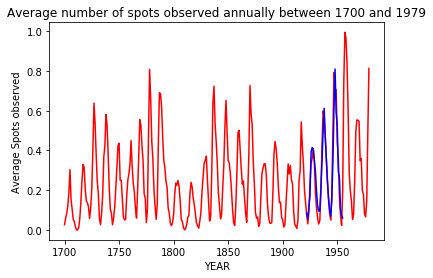

In [129]:
plt.plot(df['Year'], df['Spots'], color='r')
plt.plot(df_validation['Year'][12:47], Y_valid, color='b')
plt.xlabel('YEAR')
plt.ylabel('Average Spots observed')
plt.title('Average number of spots observed annually between 1700 and 1979')
plt.show()

In [130]:
series_test = np.array(df_test['Spots'])
generator_test = TimeseriesGenerator(series_test, series_test, length=n_input, batch_size=1)
for i in range(len(generator_test)):
    x, y = generator_test[i]
    print('%s => %s' % (x, y))
Y_pred = []
for i in range(0,len(generator_test)):
    x_input = generator_test[i][0].reshape((1, n_input))
    yhat = model.predict(x_input, verbose=0)
    Y_pred = Y_pred + [yhat]
Y_pred = np.reshape(Y_pred, (24,))

[[0.0502 0.1736 0.4843 0.7929 0.7128 0.7045 0.4388 0.363  0.1647 0.0727
  0.023  0.1987]] => [0.7411]
[[0.1736 0.4843 0.7929 0.7128 0.7045 0.4388 0.363  0.1647 0.0727 0.023
  0.1987 0.7411]] => [0.9947]
[[0.4843 0.7929 0.7128 0.7045 0.4388 0.363  0.1647 0.0727 0.023  0.1987
  0.7411 0.9947]] => [0.9665]
[[0.7929 0.7128 0.7045 0.4388 0.363  0.1647 0.0727 0.023  0.1987 0.7411
  0.9947 0.9665]] => [0.8316]
[[0.7128 0.7045 0.4388 0.363  0.1647 0.0727 0.023  0.1987 0.7411 0.9947
  0.9665 0.8316]] => [0.5873]
[[0.7045 0.4388 0.363  0.1647 0.0727 0.023  0.1987 0.7411 0.9947 0.9665
  0.8316 0.5873]] => [0.2819]
[[0.4388 0.363  0.1647 0.0727 0.023  0.1987 0.7411 0.9947 0.9665 0.8316
  0.5873 0.2819]] => [0.1961]
[[0.363  0.1647 0.0727 0.023  0.1987 0.7411 0.9947 0.9665 0.8316 0.5873
  0.2819 0.1961]] => [0.1459]
[[0.1647 0.0727 0.023  0.1987 0.7411 0.9947 0.9665 0.8316 0.5873 0.2819
  0.1961 0.1459]] => [0.0534]
[[0.0727 0.023  0.1987 0.7411 0.9947 0.9665 0.8316 0.5873 0.2819 0.1961
  0.1459 0.

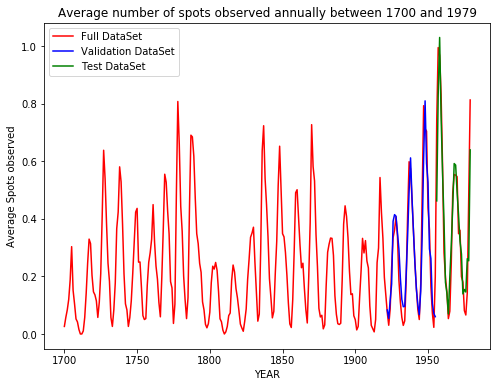

In [131]:
fig = plt.figure(figsize=(8,6))
line1 = plt.plot(df['Year'], df['Spots'], color='r')
line2 = plt.plot(df_validation['Year'][12:47], Y_valid, color='b')
line3 = plt.plot(df_test['Year'][12:], Y_pred, color='g')
plt.legend(('Full DataSet', 'Validation DataSet', 'Test DataSet'), loc='best')
plt.xlabel('YEAR')
plt.ylabel('Average Spots observed')
plt.title('Average number of spots observed annually between 1700 and 1979')
plt.show()

In [132]:
Sum_num = 0
for i in range(0, len(generator_test)):
    a = i + 12
    Sum_tmp = ((df_test['Spots'][256+i] - Y_pred[i])**2) 
    Sum_num = Sum_num + Sum_tmp

Sum_den = 0
for i in range(0, len(df['Spots'])):
    Sum_tmp = ((df['Spots'][i] - np.average(df['Spots']))**2) 
    Sum_den = Sum_num + Sum_tmp


In [133]:
ARV = Sum_num * (1 / len(generator_test)) / (Sum_den * (1 / len(df['Spots'])))

In [134]:
ARV

5.434641690259871